
**Customer Churn Prediction:**

    A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.

    Your task as a data scientist would be to predict the propensity to churn for each customer.

**Data Dictionary**
    
    There are multiple variables in the dataset which can be cleanly divided into 3 categories:
    
    I. Demographic information about customers
    
    customer_id - Customer id 
    
    vintage - Vintage of the customer with the bank in a number of days 
    
    age - Age of customer 
    
    gender - Gender of customer 

    dependents - Number of dependents 

    occupation - Occupation of the customer 

    city - City of the customer (anonymized) 

    II. Customer Bank Relationship

    customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 

    branch_code - Branch Code for a customer account 

    days_since_last_transaction - No of Days Since Last Credit in Last 1 year 

    III. Transactional Information

    current_balance - Balance as of today 

    previous_month_end_balance - End of Month Balance of previous month 

    average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 

    average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 

    current_month_credit - Total Credit Amount current month 

    previous_month_credit - Total Credit Amount previous month 

    current_month_debit - Total Debit Amount current month 

    previous_month_debit - Total Debit Amount previous month 

    current_month_balance - Average Balance of current month 

    previous_month_balance - Average Balance of previous month 

    churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 
 

    (Note: In the same downloaded folder, you can find the dataset (churn_prediction) for this problem statement. Once you upload the final project, you will be able to download the project solution (Final project solution.zip). This folder contains the Jupyter notebook file that contains the solution to this final project problem statement.)




In [121]:
!pip install matplotlib
!pip install seaborn

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
data =  pd.read_csv("E:\Project\Python\Bank customer churn\churn_prediction.csv")
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [124]:
data.shape


(28382, 21)

In [125]:
data.isnull().sum()


customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# EDA

## Catagorical columns

In [126]:
data.select_dtypes('object').head()


,gender,occupation
0,Male,self_employed
1,Male,self_employed
2,Male,salaried
3,NaN,self_employed
4,Male,self_employed


In [127]:
gender_counts = data['gender'].value_counts()
occupation_counts = data['occupation'].value_counts()

([<matplotlib.patches.Wedge at 0x2d8aa692690>,
 [Text(-0.3968366056809831, 1.0259243190370313, 'self_employed'),
  Text(-0.09718915820088841, -1.0956980731607604, 'salaried'),
  Text(0.8507033956596516, -0.6973548111350051, 'student'),
  Text(1.070136183572298, -0.25457523172790575, 'retired'),
  Text(1.099989156279018, -0.004884267455220814, 'company')],
 [Text(-0.21645633037144532, 0.5595950831111078, '61.7%'),
  Text(-0.053012268109575496, -0.5976534944513238, '23.7%'),
  Text(0.46402003399617353, -0.3803753515281845, '7.3%'),
  Text(0.5837106455848898, -0.13885921730613038, '7.2%'),
  Text(0.5999940852431007, -0.002664145884665898, '0.1%')])

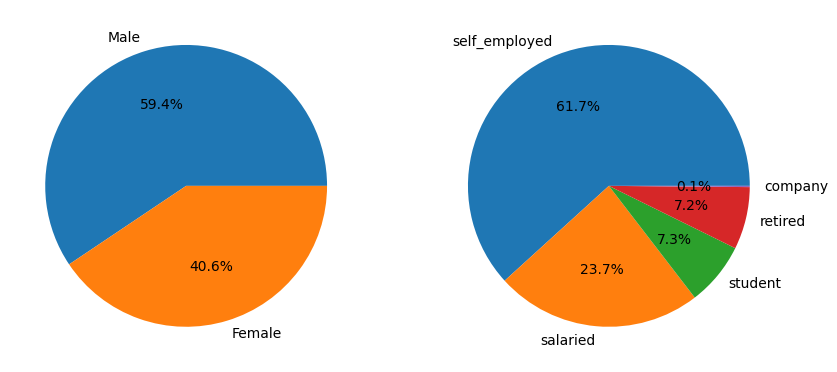

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axs[1].pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')

In [129]:
catagorical_column=["gender","occupation"]
for i in catagorical_column:
    data[i]=data[i].fillna(data[i].mode().iloc[0])

In [130]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

([<matplotlib.patches.Wedge at 0x2d8aa827fd0>,
 [Text(-0.4003095547946538, 1.024574184888584, 'self_employed'),
  Text(-0.09206324344799112, -1.0961406657933261, 'salaried'),
  Text(0.8520517427119069, -0.6957067110080244, 'student'),
  Text(1.0703036250852522, -0.25387034117708174, 'retired'),
  Text(1.099989218987988, -0.004870124248543048, 'company')],
 [Text(-0.21835066625162933, 0.558858646302864, '61.9%'),
  Text(-0.05021631460799515, -0.5978949086145414, '23.6%'),
  Text(0.46475549602467636, -0.3794763878225587, '7.3%'),
  Text(0.5838019773192284, -0.1384747315511355, '7.1%'),
  Text(0.5999941194479934, -0.0026564314082962075, '0.1%')])

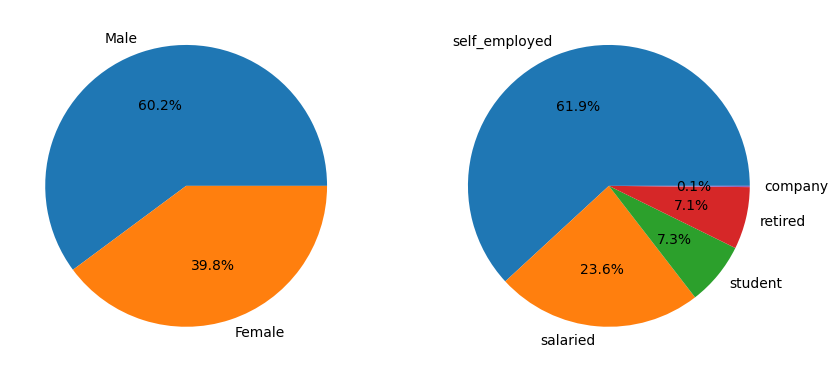

In [131]:
gender_counts1 = data['gender'].value_counts()
occupation_counts1 = data['occupation'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(gender_counts1, labels=gender_counts.index, autopct='%1.1f%%')
axs[1].pie(occupation_counts1, labels=occupation_counts.index, autopct='%1.1f%%')

## Numerical columns

In [132]:
data.select_dtypes(['int','float']).head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,0.0,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,0.0,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [133]:
numerical_columns=data.select_dtypes(['int','float']).head().columns
numerical_columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'churn'],
      dtype='object')

In [134]:
numerical_columns_null=data.select_dtypes(['int','float']).head().columns[data.select_dtypes(['int','float']).head().isnull().any()]
numerical_columns_null

Index(['dependents', 'city', 'days_since_last_transaction'], dtype='object')

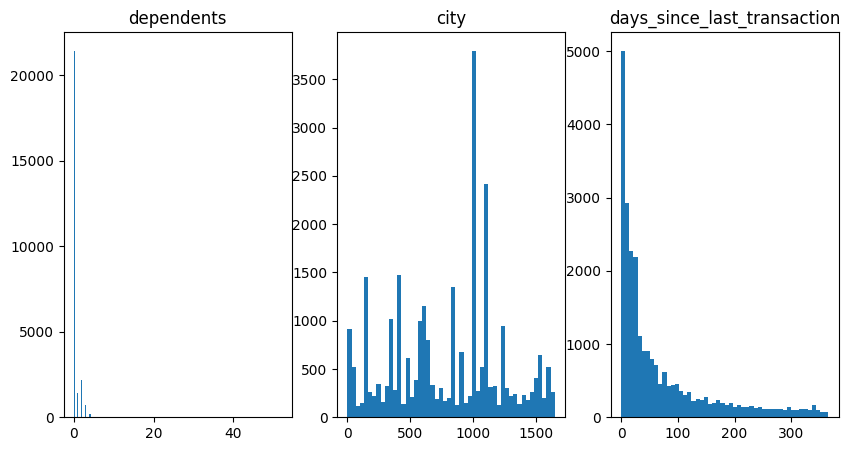

In [140]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].hist(data["dependents"],bins = 200)
axs[0].set_title('dependents')

axs[1].hist(data["city"],bins = 50)
axs[1].set_title('city')

axs[2].hist(data["days_since_last_transaction"],bins = 50)
axs[2].set_title('days_since_last_transaction')

plt.show()

In [143]:
data["dependents"].unique()

array([ 0., nan,  2.,  3.,  1.,  7.,  4.,  6.,  5.,  9., 52., 36., 50.,
        8., 25., 32.])

In [146]:
data["dependents"].value_counts()

dependents
0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: count, dtype: int64

In [148]:
data['city']= data['city'].fillna(data['city'].mean())

# "dependents" and "days_since_last_transaction" are left sqewed
data['dependents']= data['dependents'].fillna(data['dependents'].median())
data['days_since_last_transaction']= data['days_since_last_transaction'].fillna(data['days_since_last_transaction'].median())

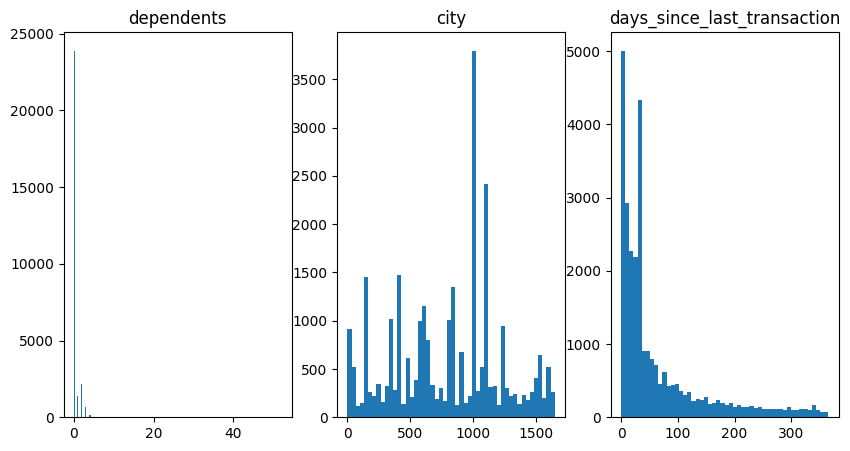

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].hist(data["dependents"],bins = 200)
axs[0].set_title('dependents')

axs[1].hist(data["city"],bins = 50)
axs[1].set_title('city')

axs[2].hist(data["days_since_last_transaction"],bins = 50)
axs[2].set_title('days_since_last_transaction')

plt.show()

In [151]:
data.isnull().sum().sum()

0

In [153]:
data.duplicated().sum()

0

In [154]:
data.shape

(28382, 21)

In [155]:
data.to_csv("cleaned_data")
